<a href="https://colab.research.google.com/github/Anuragc123/ML-Experiments/blob/main/ML_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sahil Pokharkar | 21102A0006 | BE CMPN-A

## Github Link: https://github.com/sahilpokharkar/Machine-Learning-Lab/tree/main/lab-6

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report


In [144]:
# Load datasets
attributes_array = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates',
    'alcohol', 'quality'
]

df_red = pd.read_csv('/content/winequality-red.csv', delimiter=";")
df_white = pd.read_csv('/content/winequality-white.csv', delimiter=";")

df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [145]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [146]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [147]:
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [148]:
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

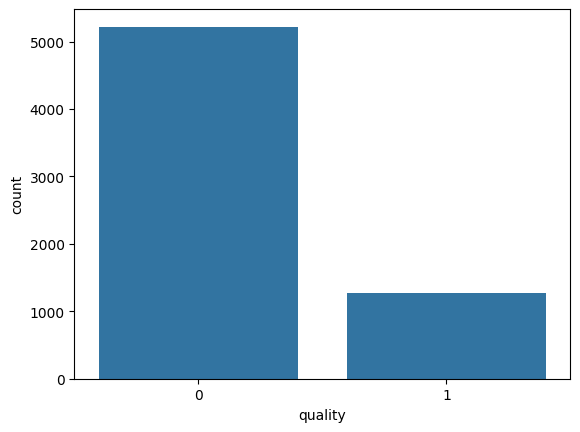

In [149]:
sns.countplot(x='quality', data=df)
plt.show()


In [150]:
#Now separate the dataset as response variable and feature variables
X = df.drop('quality', axis=1)
y = df['quality']

#Train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [152]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 1)
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8061538461538461
Precision: 0.843730177514793
Recall: 0.8061538461538461
F1-score: 0.7196330756126327


In [153]:
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1048
           1       1.00      0.00      0.00       252

    accuracy                           0.81      1300
   macro avg       0.90      0.50      0.45      1300
weighted avg       0.84      0.81      0.72      1300

[[1048    0]
 [ 252    0]]


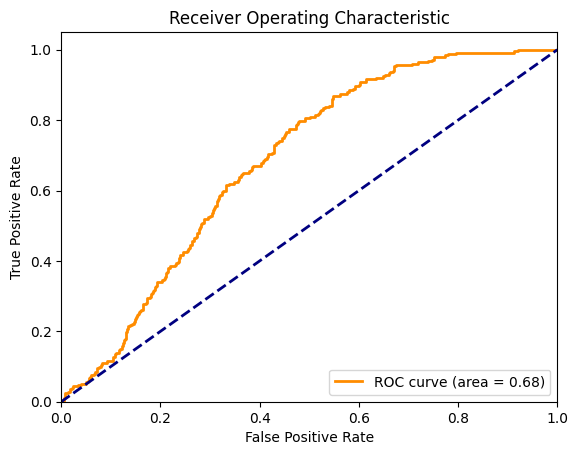

AUC: 0.684326911426148


In [154]:
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = svm_model.decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


### Regression

In [155]:
# Load the dataset
df_concrete = pd.read_excel('/content/Concrete_Data.xls')


attributes_array = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age',
    'Concrete compressive strength'
]

df_concrete.columns = attributes_array
df_concrete.to_csv('concrete_data.csv', index=False)
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


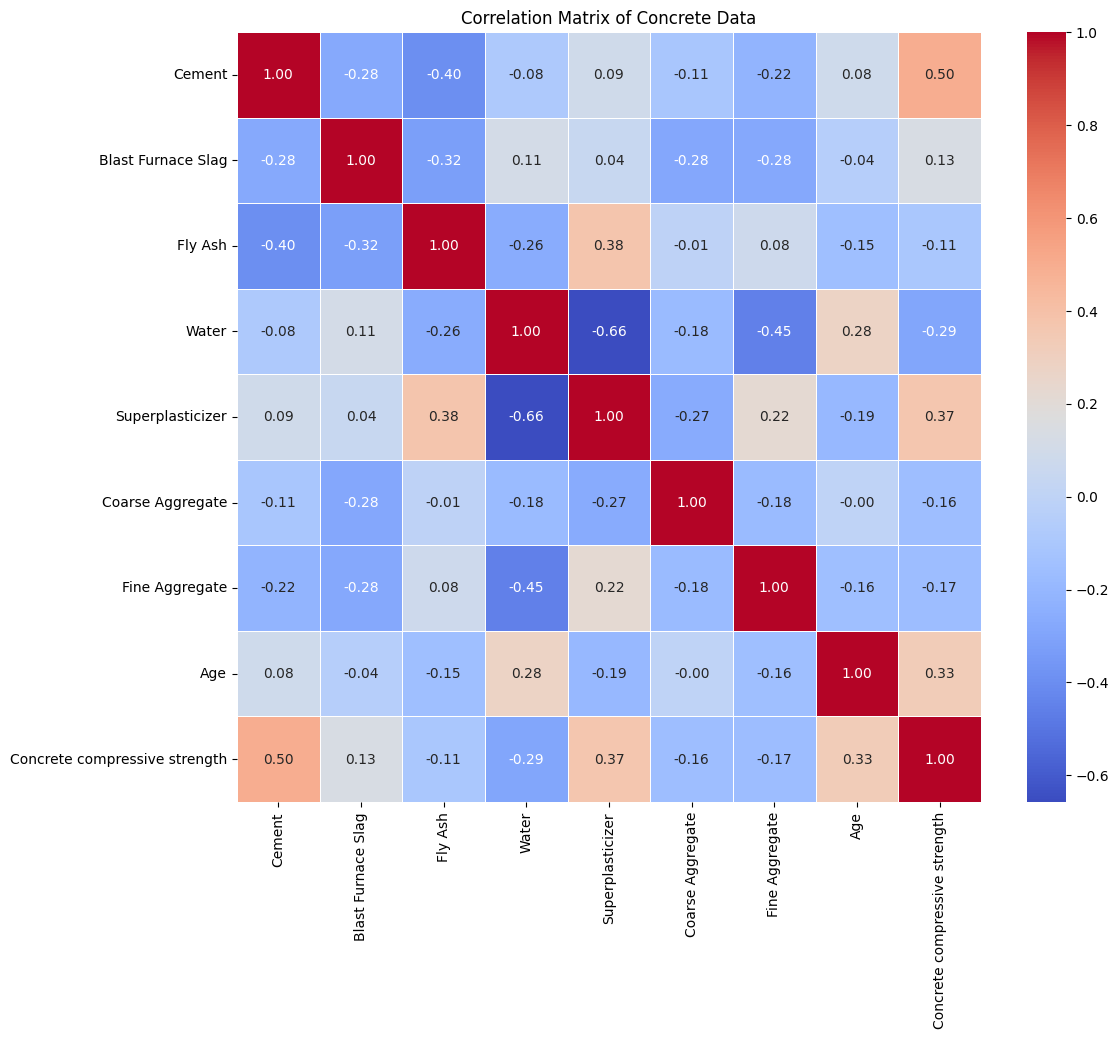

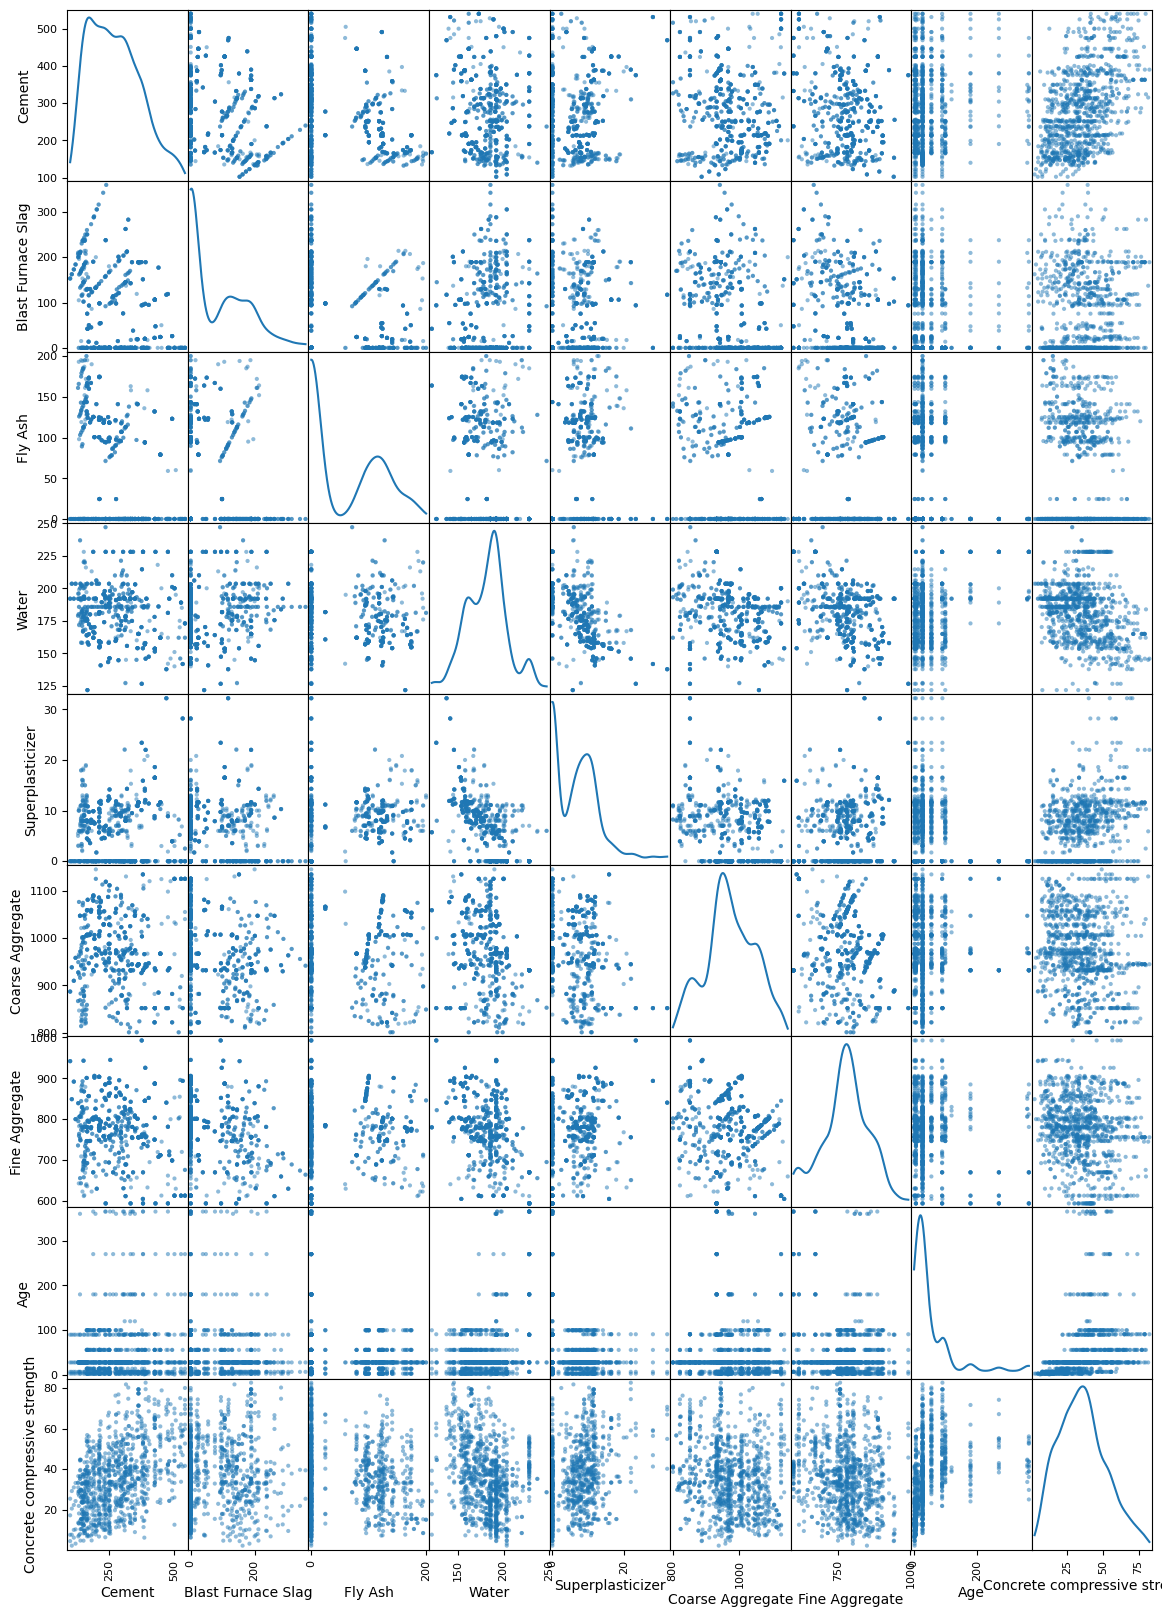

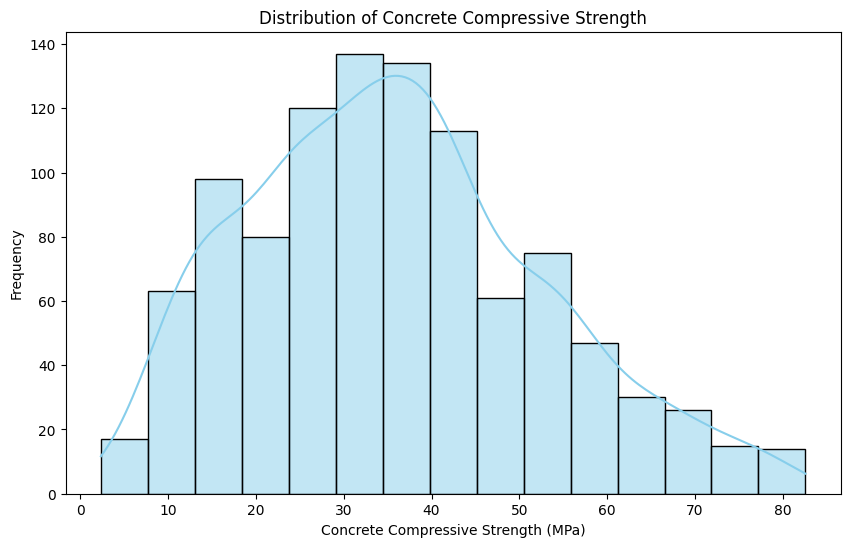

In [156]:
# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap with annotations and a title
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Concrete Data")
plt.show()

print()

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(14, 20), diagonal='kde')
plt.show()

print()

# Create a distribution plot with increased figure size and a descriptive title
plt.figure(figsize=(10, 6))
sns.histplot(df['Concrete compressive strength'], bins=15, kde=True, color='skyblue')
plt.xlabel("Concrete Compressive Strength (MPa)")
plt.ylabel("Frequency")
plt.title('Distribution of Concrete Compressive Strength')
plt.show()

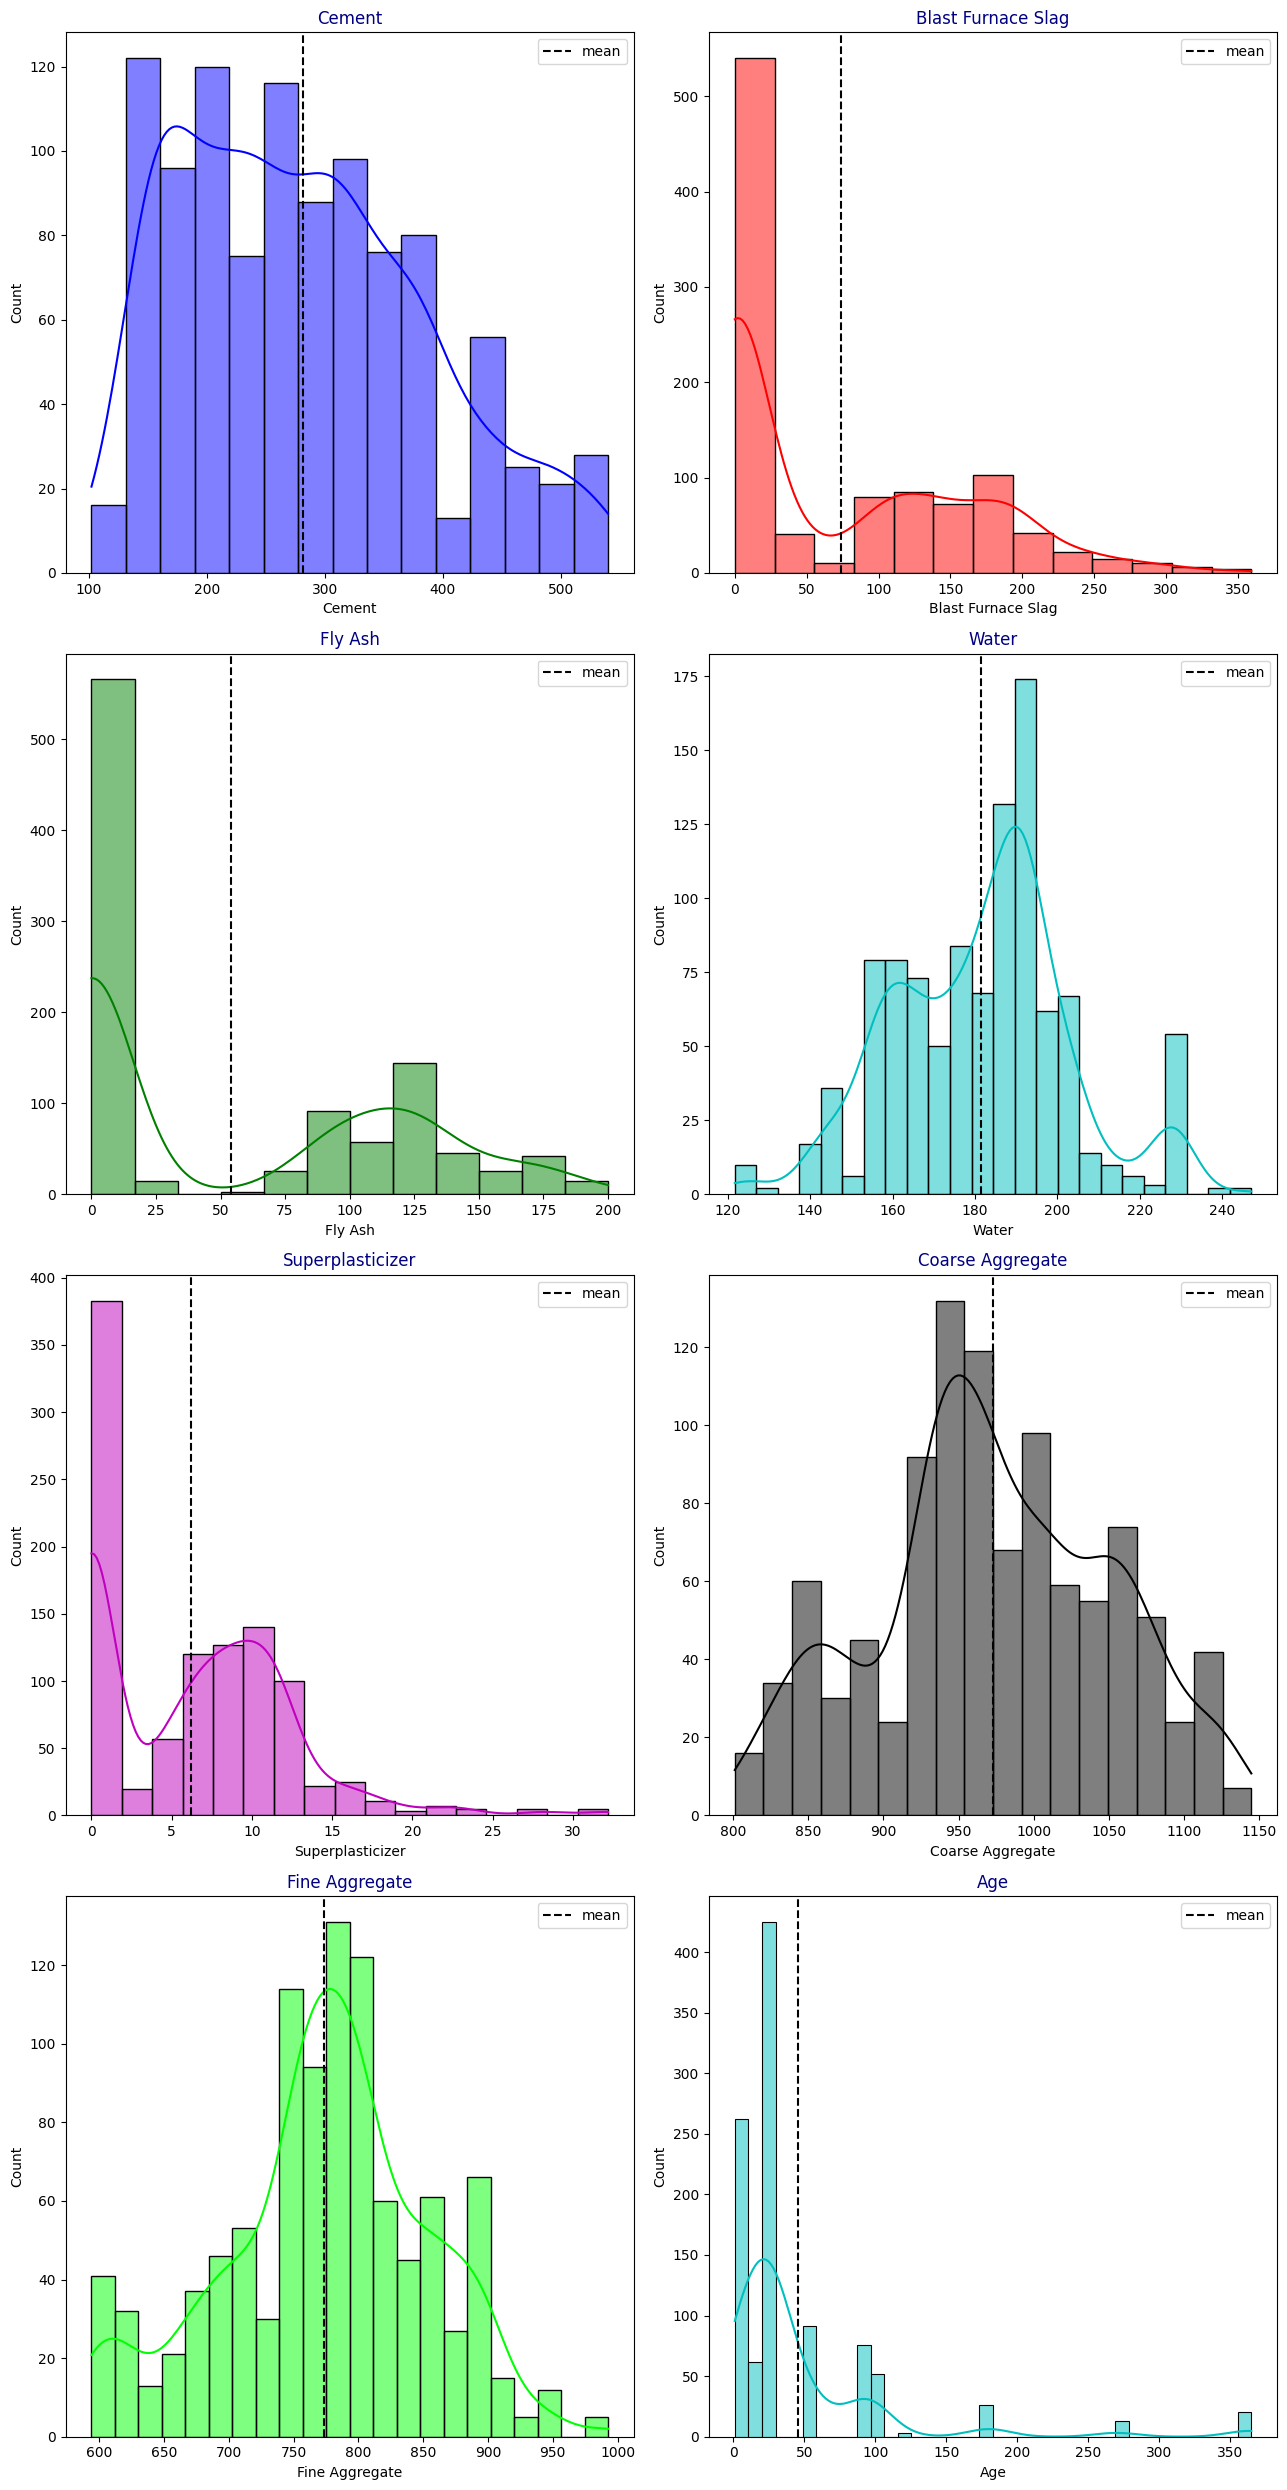

In [157]:
# Select columns for visualization (excluding 'Concrete compressive strength')
cols = [col for col in df.columns if col != 'Concrete compressive strength']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13, 25))
axes = axes.flatten()

# Define colors for plots
colors = ['b', 'r', 'g', 'c', 'm', 'k', 'lime', 'c']

# Iterate through columns and create distribution plots
for i, col in enumerate(cols):
    sns.histplot(df[col], color=colors[i], kde=True, ax=axes[i])
    axes[i].set_facecolor("w")
    axes[i].axvline(df[col].mean(), linestyle="dashed", label="mean", color="k")
    axes[i].set_title(col, color="navy")
    axes[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [158]:
# Split the data into features (X) and target (y)
X_concrete = df.drop('Concrete compressive strength', axis=1)
y_concrete = df['Concrete compressive strength']

# Split the data into training and testing sets
X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=0
)

# Scale the features using StandardScaler
scaler_concrete = StandardScaler()
X_train_concrete = scaler_concrete.fit_transform(X_train_concrete)
X_test_concrete = scaler_concrete.transform(X_test_concrete)

# Create an SVR model
svr_model = SVR(kernel='linear', C=1)

# Train the model
svr_model.fit(X_train_concrete, y_train_concrete)

# Make predictions on the test set
y_pred_concrete = svr_model.predict(X_test_concrete)

# Evaluate the model
mse = mean_squared_error(y_test_concrete, y_pred_concrete)
r2 = r2_score(y_test_concrete, y_pred_concrete)

print("SVR Model Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


SVR Model Results:
Mean Squared Error: 93.07450744225504
R-squared: 0.6374191118739791


In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)  # Try different degrees
X_train_concrete_poly = poly.fit_transform(X_train_concrete)
X_test_concrete_poly = poly.transform(X_test_concrete)

svr_model.fit(X_train_concrete_poly, y_train_concrete)
y_pred_concrete = svr_model.predict(X_test_concrete_poly)

# Evaluate the model
mse = mean_squared_error(y_test_concrete, y_pred_concrete)
r2 = r2_score(y_test_concrete, y_pred_concrete)

print("SVR Model Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


SVR Model Results:
Mean Squared Error: 44.55026320014946
R-squared: 0.8264500727293151


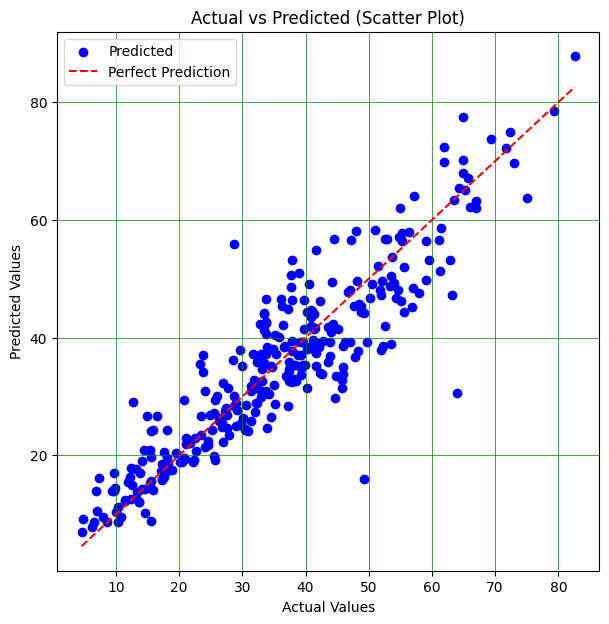

In [160]:
# Create a DataFrame from the actual and predicted values
dat = pd.DataFrame({'Actual': y_test_concrete, 'Predicted': y_pred_concrete})

# Sort the DataFrame by the 'Actual' column
dat_sorted = dat.sort_values(by=['Actual'])

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(7, 7))

plt.scatter(dat_sorted['Actual'], dat_sorted['Predicted'], color='blue', label='Predicted')

# Plot the perfect prediction line (Actual = Predicted)
plt.plot(dat_sorted['Actual'], dat_sorted['Actual'], color='red', label='Perfect Prediction', linestyle='--')

# Add grid, labels, and title
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Actual vs Predicted (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()
